# matplotlib

This notebook gives brief examples of how to read in some data from a CSV file and then plot it out in matplotlib, demonstrating some of the power of this display package. You might like to compare with the UsingBokeh notebook.

We've provided a data file called 'compton.csv' for this notebook and it needs to be in the same folder.

Firstly do the imports and notebook setup.

The '_%matplotlib inline_' line just instructs matplotlib to insert the figure into the Jupyter Notebook - you wouldn't need this in an 'ordinary' Python program.

The '_plt.rcParams['figure.figsize']=[12,8]_' jut sets the required size for a plot.


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
#import numpy as np
import pandas as pd

#Set the size of subsequent plots
plt.rcParams['figure.figsize']=[12,8]

## 1. Read in the data

Now we'll read in some data. In this case the data comes from the SXPA288 Compton experiment. There are seven columns, the first simply contains channel numbers, the second is calibration data and then the next 5 contain data from scattering angles of 30, 60, 90 120 and 150 degrees.

Additionally, the first line contains the coulumn header names: Channels,Calibration,30,60,90,120,150

We'll read in the CSV data to a pandas DataFrame (See the UsingPandas notebook) - you could use the numpy 'genfromtxt' function. 


In [11]:
# Read in multi-column data from a CSV to array
#compton_data=np.genfromtxt('compton.csv', delimiter=',', names=True)
compton_data = pd.read_csv('compton.csv')
# Let's have alook at the firt few rows
compton_data.head()

,Channels,Calibration,30,60,90,120,150
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,2,0,0,0,0,0,0
3,3,0,0,0,0,0,0
4,4,0,0,0,0,0,0


## 2. A simple Plot

Now to just simply plot this data we'll use the '_matplotlib.pyplot_' '_plot_' function. passing it x and y values. In this case just Calibration against Channel number

We can spruce it up a bit by adding labels, axes etc. All pretty self-explanatory except perhaps note the addition of a '_label_' parameter which will be used later to produce a figure legend.

NOTE: It may seem starnge to add the title etc. AFTER the plot() but matplotlib implicitly assumes that any other instructions we use apply to the current plot.


Text(0, 0.5, 'Intensity')

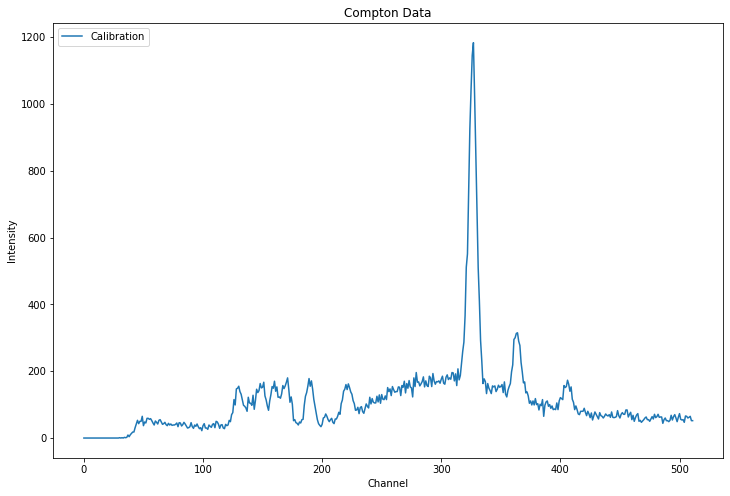

In [21]:
plt.plot(compton_data['Channels'], compton_data['Calibration'], label='Calibration')
plt.title('Compton Data')
plt.legend(loc='upper left')
plt.xlabel('Channel')
plt.ylabel('Intensity')


## 3. More than 1 line in the plot

What about adding another line of data? Pretty much the same as before but we've added a '_color_' parameter as well.

NOTE: AS we've said before, matplotlib implicitly assumes that any subsequent plot is added to any current plot.

Text(0, 0.5, 'Intensity')

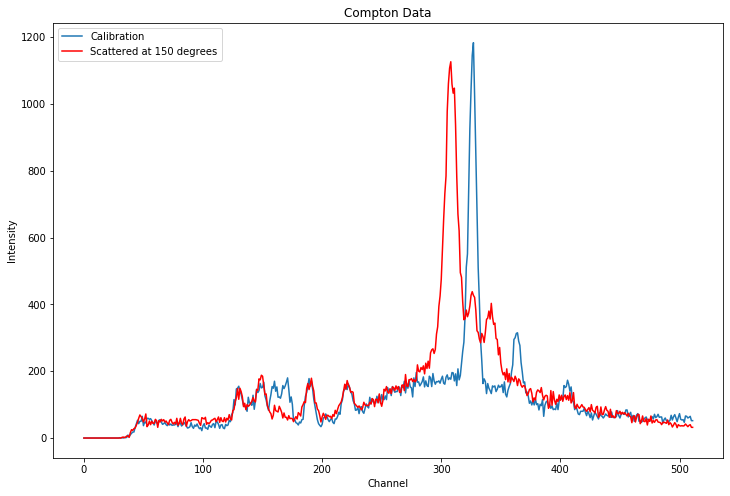

In [22]:
plt.plot(compton_data['Channels'], compton_data['Calibration'], label='Calibration')
plt.plot (compton_data['Channels'], compton_data['150'], label='Scattered at 150 degrees', color='red')
plt.title('Compton Data')
plt.legend(loc='upper left')
plt.xlabel('Channel')
plt.ylabel('Intensity')


## 4. Annotations

Finally, just to show some of the other things you can do, how about some annotations? You can work out how these do their stuff! And, finally, finally - uncomment the first line below to see a 'fun' cartoonised plot!


Text(450, 400, '$K \\beta$')

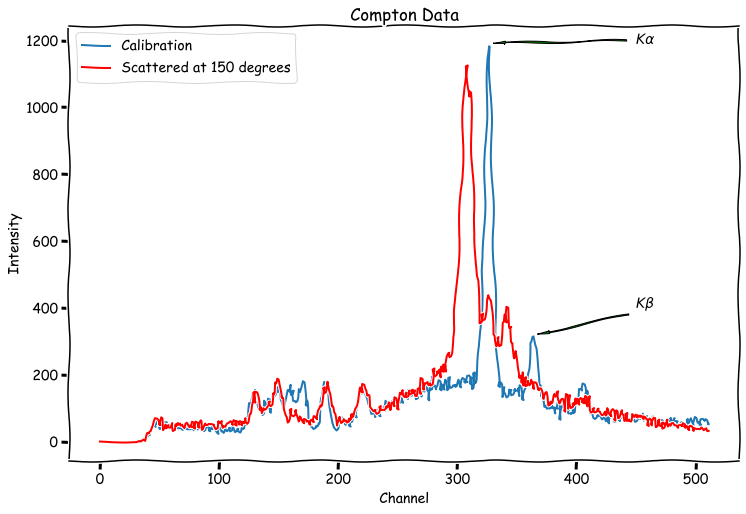

In [23]:
# plt.xkcd() # For a bit of fun, uncomment this line!
plt.plot(compton_data['Channels'], compton_data['Calibration'], label='Calibration')
plt.plot (compton_data['Channels'], compton_data['150'], label='Scattered at 150 degrees', color='red')

plt.title('Compton Data')
plt.legend(loc='upper left')
plt.xlabel('Channel')
plt.ylabel('Intensity')

plt.annotate(r"$K \alpha$", xy=(324,1191), xytext=(450, 1190), arrowprops=dict(facecolor='green', width=1, headwidth=3, shrink=.05))
plt.annotate(r"$K \beta$", xy=(363,318), xytext=(450, 400), arrowprops=dict(facecolor='green', width=1, headwidth=3, shrink=.05))

## 4. Further modifications

You can modify the figures produced in many, many ways. You can change colours, data point markers, line styles and so on. You can produce scatter plots, polar projections ... The matplotlib documentation is the place to start: https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py.


## 4.1 Polar plots

As an example of a variation, here we show how to produce a 'polar' plot. For those of you doing ARROW, this will be useful when plotting the spiral arms of the Galaxy


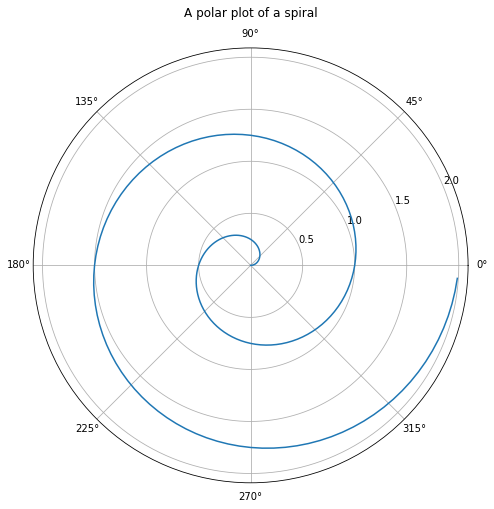

In [15]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

plt.subplot(111, projection='polar')
plt.plot(theta, r)
# For 'yticks', read 'radial ticks'
plt.yticks([0.5, 1, 1.5, 2])
plt.grid(True)
plt.title("A polar plot of a spiral", va='bottom')
plt.show()

## 5. Multiple sub-plots

Here's how to produce simple multiplots.

This simplified method makes use of many implicit, underlying propreties of matplotlib. The subplots are actually part of an overlying object, a 'figure', called 'axes' (confusingly!). Tighter control of any plot can be done by addressing the figure and axes objects directly. This is beyond the scope of this notebook but details can, of course, be found in the matplotlib documentation. You might start here. https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html

The main thing to look at here is the '_plt.subplot()_' function which can be generalised to '_plt.subplot(nrows, ncols, index)_'. Where nrows and ncols are the number or rows and columns of the overall plot and index is the 'oredring' of the particulat sub-plot - starting in the top left corner and progressing to the right and downwards.

Also note the '_plt.suptitle()_' which gives an overall title to the plots.


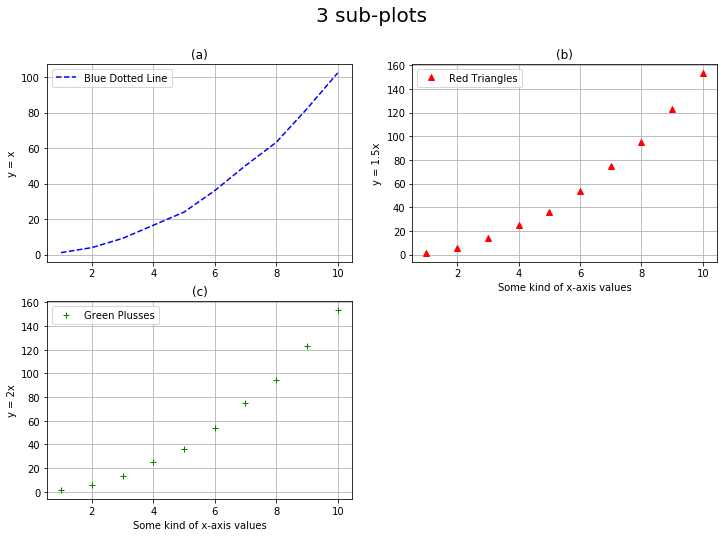

In [20]:
my_url = 'http://physics.open.ac.uk/squares_2.csv'
sq_data = pd.read_csv(my_url)
#sq_data = np.genfromtxt(my_url, delimiter=',', names=True)

x = sq_data['x_values']
y = sq_data['y_values']
y2 = y*1.5
y3 = y*2

plt.subplot(2,2,1, title='(a)')
plt.plot(x,y, 'b--',label='Blue Dotted Line')
plt.ylabel('y = x')
plt.grid()
plt.legend()

plt.subplot(2,2,2, title='(b)')
plt.plot(x,y2, 'r^', label='Red Triangles')
plt.xlabel('Some kind of x-axis values')
plt.ylabel('y = 1.5x')
plt.grid()
plt.legend()

plt.subplot(2,2,3, title='(c)')
plt.plot(x,y2, 'g+', label='Green Plusses')
plt.xlabel('Some kind of x-axis values')
#plt.xlabel('title of the xlabel', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')
plt.ylabel('y = 2x')
plt.grid()
plt.legend()

plt.suptitle('3 sub-plots', size=20)


plt.show()